## NOVANECTAR##  SERVICES PVT. LTD.

## Data Analytics##  Elementary Task -Car_Price Analysis (In Python)##  
 Deadline: 25/05/2025

# Import the librarie

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Inspecting the data frame.

In [165]:
# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# View first few rows
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [167]:
# Basic information
df.info()

# Check null values
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Null Count': null_counts, 'Null %': null_percent})
null_df[null_df['Null Count'] > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,Null Count,Null %


# # (Example, no columns actually dropped unless threshold met)

In [169]:
# (Example, no columns actually dropped unless threshold met)
df = df.dropna(axis=1, thresh=len(df)*0.6)


In [171]:
df = df.dropna(thresh=int(df.shape[1]*0.7))


In [173]:
df.drop(['car_ID'], axis=1, inplace=True)


In [175]:
df.sort_values(by='price', ascending=False).head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [177]:
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop(['CarName'], axis=1, inplace=True)


In [179]:
df['carCompany'] = df['carCompany'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'nissan': 'nissan',
    'alfa-romero': 'alfa-romeo'
})


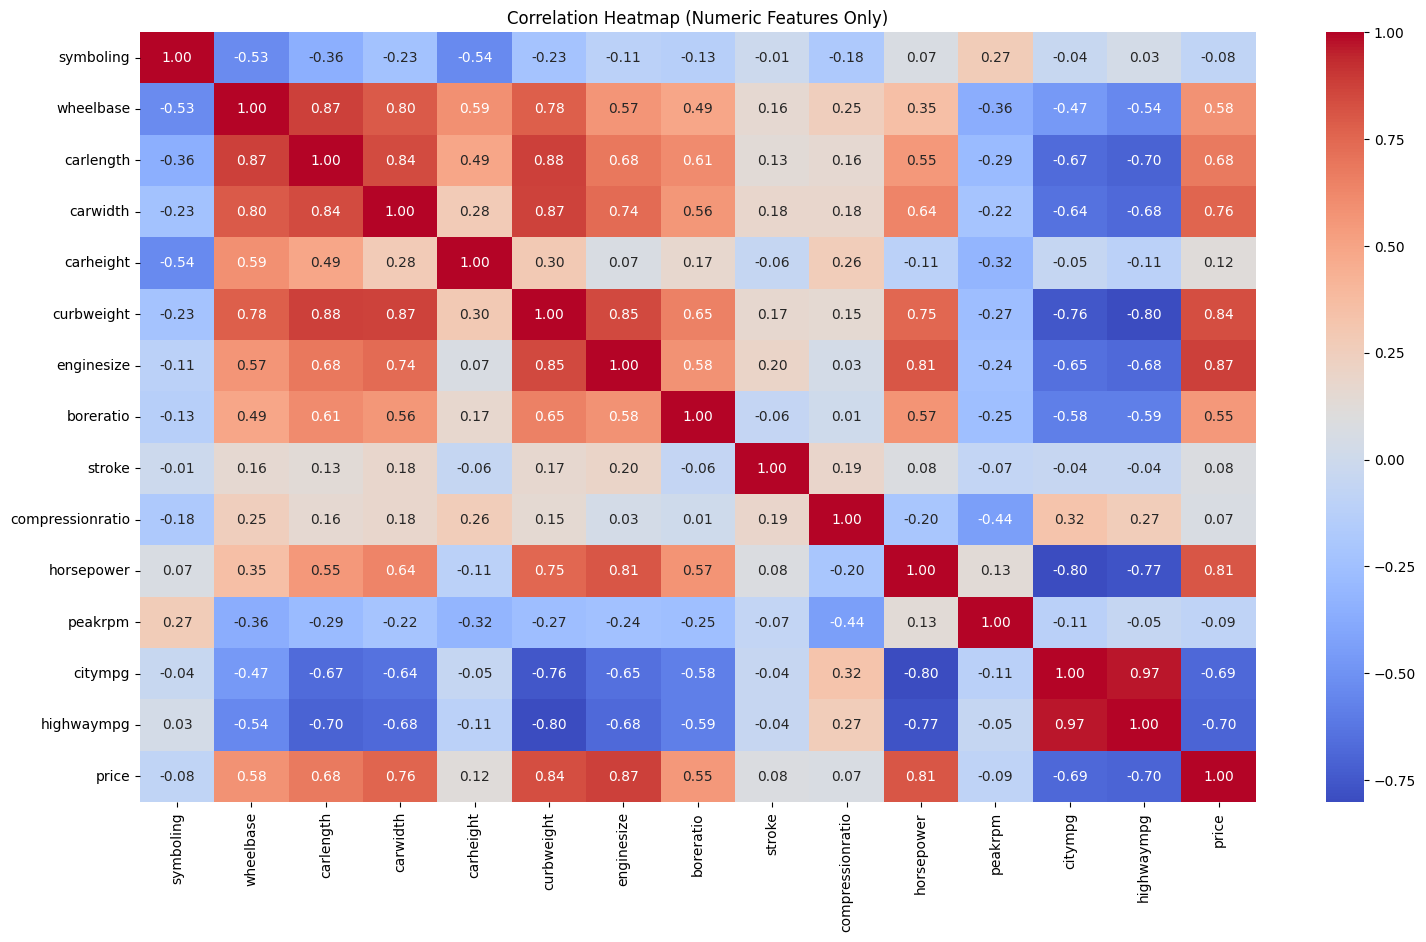

In [181]:
# Only include numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(18,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [184]:
df['car_stability'] = df['wheelbase'] / df['carlength']

# Based on correlation guidance
df.drop(['carlength', 'carwidth', 'curbweight', 'highwaympg', 'wheelbase', 'car_stability'], axis=1, inplace=True)


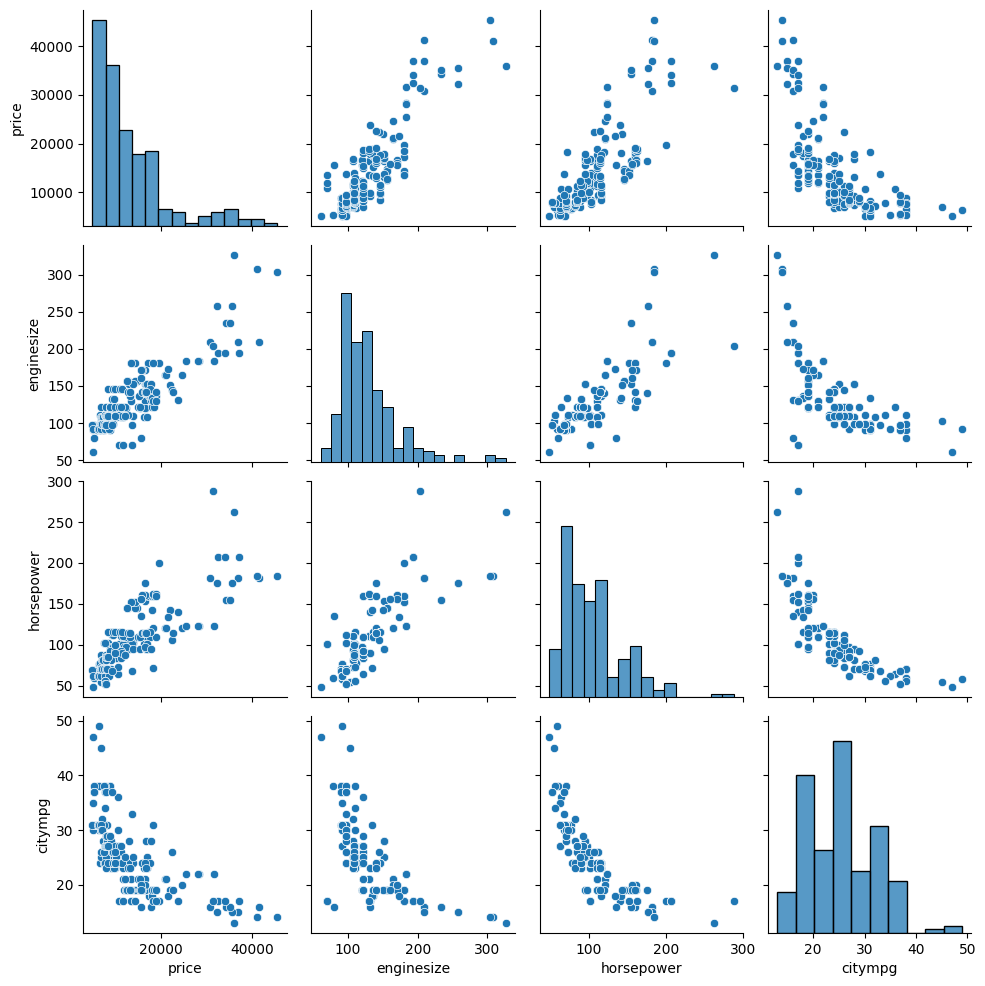

In [186]:
sns.pairplot(df[['price', 'enginesize', 'horsepower', 'citympg']])


#  Data Analysis


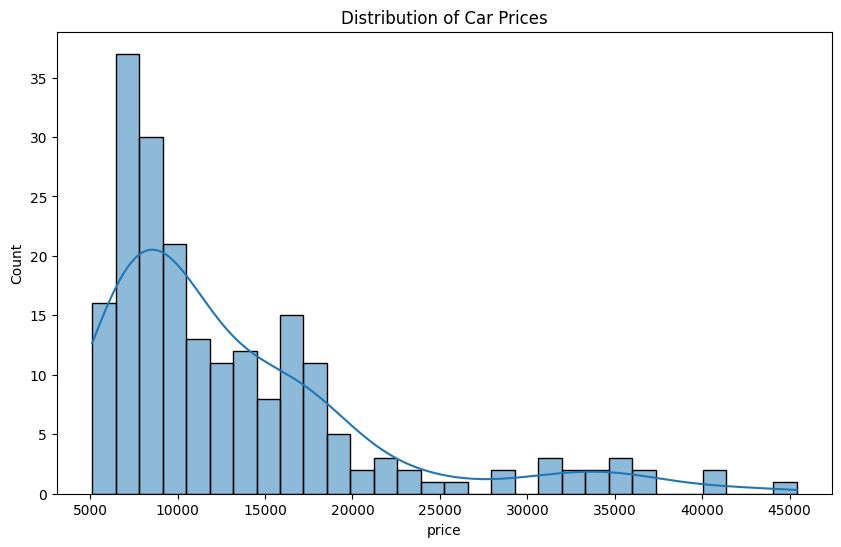

In [187]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.show()


In [190]:
df = pd.get_dummies(df, columns=['carCompany'], drop_first=False)

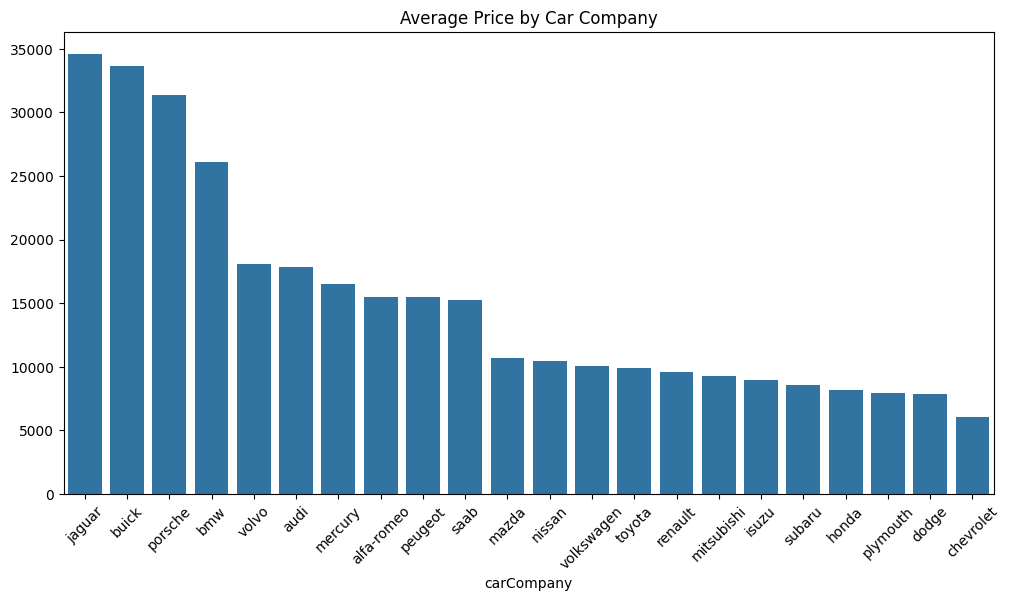

In [192]:
import re
df_bar = df.copy()

# ✅ FIXED LINE
car_company_cols = [col for col in df_bar.columns if col.startswith('carCompany_')]
df_bar['carCompany'] = df_bar[car_company_cols].idxmax(axis=1).str.replace('carCompany_', '', regex=True)

avg_price = df_bar.groupby('carCompany')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)
plt.title('Average Price by Car Company')
plt.show()




In [194]:
df.describe()


,symboling,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,53.724878,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,13276.710571
std,1.245307,2.443522,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,7988.852332
min,-2.000000,47.800000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,5118.000000
25%,0.000000,52.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,7788.000000
50%,1.000000,54.100000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,10295.000000
75%,2.000000,55.500000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,16503.000000
max,3.000000,59.800000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,45400.000000


## Insights and Report 

## Brands like BMW and Porsche have higher average prices.

## Engine size and horsepower show strong correlation with price.

## City mileage and highway mileage are highly correlated (→ dropped one).

##  Dropped redundant columns based on multicollinearity.

## Key Findings:
## Engine Size & Horsepower → Strongly Increase Price

## Engine size (r = 0.87) and horsepower (r = 0.81) are top predictors of higher car prices.

## Brand Matters

## Premium brands like BMW, Audi, Jaguar, Mercedes-Benz have significantly higher average prices.

## Fuel Efficiency Lowers Price

## City and highway MPG are negatively correlated with price — efficient cars are generally cheaper.

## High Feature Correlation

## Features like wheelbase, carlength, and curbweight are highly correlated. Only one was retained to avoid redundancy.

## Categorical Data Cleaned

## CarName was split into carCompany, spelling corrected, and dummy variables created for modeling.

## Car Stability Dropped

## New feature car_stability was redundant due to high correlation with existing features.